In [23]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt 


r = lambda x : round(x, 2)

In [63]:
N = 10
dt = 0.1
Lf = 2.67

ref_v = 70

cte_weight = 2000
epsi_weight = 2000
v_weight = 100
actuator_cost_weight = 10
change_steer_cost_weight = 100000
change_acc_cost_weight = 10000

In [64]:
def objective(vars, test=False):
    cost = 0
    for i in range(N):
        if i == 0:
            coeffs = [0.00001, 0.0075, 0.00287, 0.6]
            coeffs.reverse()
            x = 0 
            y = 0
            psi = 10
            v = 60
            cte = 2
            epsi = 10
        
        if test:
            print(r(x), '\t', r(y), '\t', cte)
            
        cost += cte_weight * (cte) ** 2
        cost += epsi_weight * (epsi) ** 2
        cost += v_weight * (v - ref_v) ** 2

        # since there are N - 1 acctuators
        if i == N - 1:
            return cost
        
        delta = vars[i]
        a = vars[i + N - 1]

        cost += actuator_cost_weight * (delta) ** 2
        cost += actuator_cost_weight * (a) ** 2

        if i != 0:
            cost += change_steer_cost_weight * (delta - prev_delta) ** 2
            cost += change_acc_cost_weight * (a - prev_a) ** 2

        prev_delta = delta
        prev_a = a

        # calculate values for next iteration
        f = coeffs[0] + coeffs[1] * x + coeffs[2] * x ** 2 + coeffs[3] * x ** 3
        psides = np.arctan(coeffs[1] + 2 * coeffs[2] * x + 3 * coeffs[3] * x ** 2)

        x = x + v * np.cos(psi) * dt
        y = y + v * np.sin(psi) * dt
        psi = psi - v * delta / Lf * dt
        v = v + a * dt
        cte = f - y + v * np.sin(epsi) * dt
        epsi = psi - psides - v * delta / Lf * dt

In [65]:
n_vars = (N - 1) * 2
bounds = [None] * n_vars
vars = [0] * n_vars

delta = 0.3
bounds[0] = (delta, delta)
max_radians = 25 * np.pi / 180
for i in range(1, N - 1):
    bounds[i] = (-max_radians, max_radians)

a = 0.12
bounds[N-1] = (a, a)
max_acc_value = 1.0
for i in range(N, n_vars):
    bounds[i] = (-max_acc_value, max_acc_value)

In [70]:
a = time.time()
for i in range(5):
    solution = minimize(objective, vars, bounds=bounds)
print(time.time() - a)
print(solution.success)
print(objective(vars))
print(solution.fun)

1.8989121913909912
True
9663371.796452926
1609187.8472088962


In [67]:
for i in range(N-1):
    print(r(solution.x[i]), '\t', r(solution.x[i+N-1]))

0.3 	 0.12
0.44 	 0.17
0.44 	 0.21
0.44 	 0.26
0.44 	 0.29
0.44 	 0.33
0.25 	 0.39
-0.02 	 0.43
0.24 	 0.45


In [58]:
objective(solution.x, True)

0 	 0 	 2
-5.03 	 -3.26 	 0.5993471746669332
-11.01 	 -2.67 	 7.644583881373825
-13.83 	 2.61 	 4.3215763395534275
-11.03 	 7.9 	 -4.383691210823593
-5.08 	 8.52 	 -10.78413876472095
-1.25 	 3.96 	 -9.090659366648012
-2.87 	 -1.77 	 0.09625001127354782
-7.34 	 -5.69 	 5.400944076232709
-11.65 	 -9.77 	 6.344240775549842


5073037.202001798

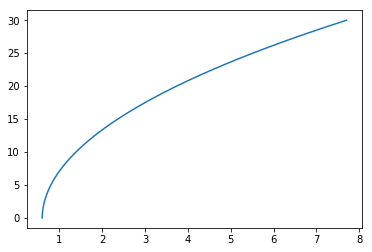

In [418]:
def curve(x):
    coeffs = [0.00001, 0.0075, 0.00287, 0.6]
    coeffs.reverse()
    return coeffs[0] + coeffs[1] * x + coeffs[2] * x ** 2 + coeffs[3] * x ** 3

x = np.array(np.arange(0, 30, 0.01))  
y = curve(x)
plt.plot(y, x)  
plt.show()

In [71]:
pts_x = [-30, 0, 30, 60, 90]
pts_y = [0, 0, 6, 6, 6]
f = interpolate.interp1d(pts_x, pts_y, kind='cubic')
x = np.arange(-20, 80, 0.1)
plt.plot(f(x), x)  
plt.show()

NameError: name 'interpolate' is not defined

In [292]:
from scipy import interpolate

pts_x = [-30, 0, 30, 60, 90]
pts_y = [0, 0, 6, 6, 6]
tck = interpolate.CubicSpline(pts_x, pts_y)

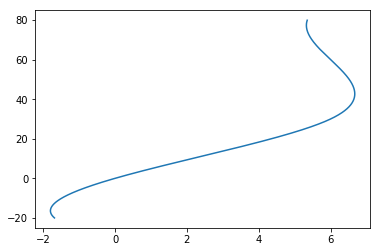

In [298]:
x = np.arange(-20, 80, 0.1)
plt.plot(tck(x), x)  
plt.show()

In [248]:
k = []
for i in tck.c:
    k.append(i[1])
    print(i[1])

-0.00034375000000000003
0.0075000000000000015
0.2875
0.0


In [322]:
f.__dict__

{'_call': <function scipy.interpolate.interpolate.interp1d._call_spline>,
 '_extrapolate': False,
 '_fill_value_above': array([nan]),
 '_fill_value_below': array([nan]),
 '_fill_value_orig': array(nan),
 '_kind': 'spline',
 '_spline': <scipy.interpolate._bsplines.BSpline at 0x28a7f936128>,
 '_y': array([[0.],
        [0.],
        [6.],
        [6.],
        [6.]]),
 'axis': 0,
 'bounds_error': True,
 'copy': True,
 'x': array([-30,   0,  30,  60,  90]),
 'y': array([0., 0., 6., 6., 6.])}

In [10]:
import time

In [19]:
a = time.time()

In [20]:
time.time() - a

1.9219017028808594